<a href="https://colab.research.google.com/github/shivanshuk/machine-learning/blob/master/Face_detection_Questions_Project_CV_AIML_Online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
project_path = "/content/drive/My Drive/AI-ML/"

In [0]:
import os
os.chdir(project_path)

In [4]:
!pip install numpy==1.16.1
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

In [0]:
data = np.load(project_path+"images.npy")

In [8]:
data.shape

(409, 2)

image shape h, w, c :  (333, 650, 3)


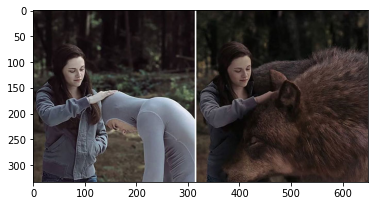

In [15]:
img1 = data[0][0]
img1 = img1[:, :, :3]

print("image shape h, w, c : ", data[0][0].shape )
plt.imshow(img1)
plt.show()

In [16]:
data[0][1]

[{'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}]},
 {'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}]}]

In [17]:
data[10][0].shape # image size h, w, c

(337, 600, 3)

In [18]:
data[10][1]

[{'imageHeight': 337,
  'imageWidth': 600,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.48, 'y': 0.10385756676557864},
   {'x': 0.7716666666666666, 'y': 0.6795252225519288}]}]

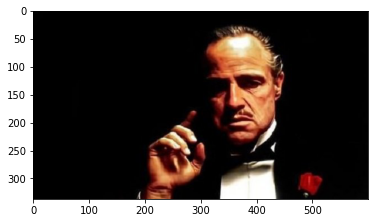

In [19]:
plt.imshow(data[10][0]) # Original image before resizing

In [0]:
img10 = data[10][0]
img10 = cv2.resize(img10, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
try:
    img10 = img10[:, :, :3]
except:
    print("catch")

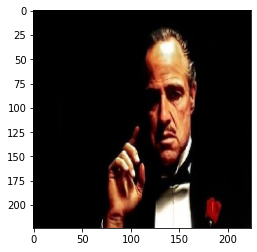

In [21]:
plt.imshow(img10) # Showing image after resizing to 224 x 224

In [22]:
X_t = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
X_t[10] = preprocess_input(np.array(img10, dtype=np.float32))

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))

masks.shape

(409, 224, 224)

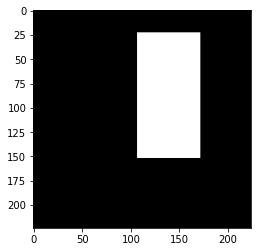

In [24]:
   for i in data[10][1]:
    x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
    x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
    y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
    y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
    masks[10][y1:y2, x1:x2] = 1
    masks[10].shape
    plt.imshow(masks[10], cmap='gray')

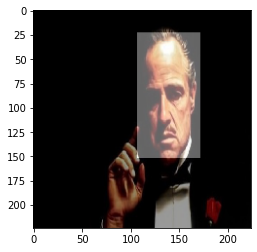

In [25]:
# Checking if the calculated masks are located properly after superimposing
plt.imshow(img10)
plt.imshow(masks[10], alpha=0.4, cmap='gray')

In [0]:
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [27]:
X_train.shape

(409, 224, 224, 3)

In [28]:
masks.shape

(409, 224, 224)

In [29]:
n = 10
print(X_train[n])

[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


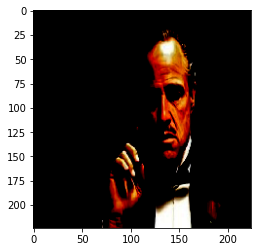

In [30]:
plt.imshow(X_train[10])

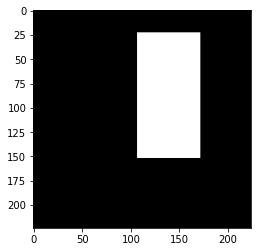

In [32]:
plt.imshow(masks[n], cmap='gray')

**Adding Model Now**

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape, Dropout
from tensorflow.keras.models import Model


def create_model(trainable=True):
    #### Add your code here ####
   
    
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights='imagenet')
    
   
    
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    #### Add your code here ####
    
    # After peeling the top, the exposed(last) layer from mobileNet is conv_pw_13_relu (ReLU) (None, 7, 7, 1024)
    # we need to upsample from this layer till our mask output that is 224 x 224 x 1
    
    #  conv_pw_13_relu (None, 7, 7, 1024) - Start Layer for UNet
    block_pw_13 = model.get_layer("conv_pw_13_relu").output  
    # CONV conv_pw_13_relu (7, 7, 1024) & (3 x 3 ) @ 512 FILTERS --> X(7, 7, 512)
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(block_pw_13) 
    
    # conv_pw_11_relu (14, 14, 512)
    block_pw_11 = model.get_layer("conv_pw_11_relu").output
    # UPSAMPLE X(7, 7, 512) --> (14, 14, 512)
    # CONCAT X(14, 14, 512) & conv_pw_11_relu (14, 14, 512) --> X(14, 14, 1024)
    x = Concatenate()([UpSampling2D()(x), block_pw_11])
    # CONV X(14, 14, 1024) & (3 x 3 ) @ 512 FILTERS --> X(14, 14, 512) 
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
    
    x = Dropout(0.5)(x)
    
    # conv_pw_5_relu (28, 28, 256)
    block_pw_5 = model.get_layer("conv_pw_5_relu").output
    # UPSAMPLE X(14, 14, 512) --> X(28, 28, 512)
    # CONCAT X(28, 28, 512) & conv_pw_5_relu (28, 28, 256) --> X(28, 28, 768)
    x = Concatenate()([UpSampling2D()(x), block_pw_5])
    # CONV X(28, 28, 768) & (3 x 3 ) @ 512 FILTERS --> X(28, 28, 512)
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
    
    x = Dropout(0.5)(x)
    
    # conv_pw_3_relu (56, 56, 128)
    block_pw_3 = model.get_layer("conv_pw_3_relu").output
    # UPSAMPLE X(28, 28, 512) --> X(56, 56, 512)
    # CONCAT  X(56, 56, 512) & conv_pw_3_relu (56, 56, 128) --> X(56, 56, 640)
    x = Concatenate()([UpSampling2D()(x), block_pw_3])
    # CONV X(56, 56, 640) & (3 x 3 ) @ 512 FILTERS --> X(56, 56, 512)
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)

    x = Dropout(0.5)(x)
    
    # conv_pw_1_relu (112, 112, 64)
    block_pw_1 = model.get_layer("conv_pw_1_relu").output
    # UPSAMPLE X(56, 56, 512) --> X(112, 112, 512)
    # CONCAT X(112, 112, 512) & conv_pw_1_relu (112, 112, 64) --> X(112, 112, 576)
    x = Concatenate()([UpSampling2D()(x), block_pw_1])
    # CONV X(112, 112, 576) & (3 x 3 ) @ 512 FILTERS --> X(112, 112, 512)
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
    
    x = Dropout(0.5)(x)
    
    # INPUT LAYER (224, 224, 3)
    block_input_1 = model.input
    # UPSAMPLE X(112, 112, 512) --> X(224, 224, 512)
    # CONCAT X(224, 224, 512) & INPUT LAYER (224, 224, 3) --> X(224, 224, 515)
    x = Concatenate()([UpSampling2D()(x), block_input_1])
    # CONV X(224, 224, 515) & (3 x 3 ) @ 1024 FILTERS --> X(224, 224, 1024)
    x = Conv2D(1024, kernel_size=3, padding='same', activation='relu')(x)
    
    x = Dropout(0.5)(x)
    
    # Do (1x1) CONVOLUTION on X(224, 224, 1024) --> X(224, 224, 1)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH, 1))(x)
    
    return Model(inputs=model.input, outputs=x)

In [34]:
model = create_model(False)

# Print summary
model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_____________________________

In [0]:
def dice_coefficient(y_true, y_pred):
    #### Add your code here ####
    
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    
    return numerator / (denominator + tf.keras.backend.epsilon())

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

In [0]:

from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

In [38]:

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

In [0]:
# Split train and valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, masks, test_size=0.03, random_state=1)

In [40]:
X_train.shape

(396, 224, 224, 3)

In [41]:
y_train.shape

(396, 224, 224)

In [42]:

X_valid.shape

(13, 224, 224, 3)

In [43]:
y_valid.shape


(13, 224, 224)

In [0]:
#### Add your code here ####
EPOCHS = 1
BATCH_SIZE = 1

In [0]:

model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,    
    epochs=EPOCHS,
    callbacks=[checkpoint, reduce_lr, stop],
    validation_data=(X_valid, y_valid)
)

Epoch 1/10
 32/396 [=>............................] - ETA: 2:51:06 - loss: 1.7516 - dice_coefficient: 0.3532

In [0]:
pred_masks = model.predict(X_valid[0:5], verbose=1)

In [0]:
fig, a = pyplot.subplots(5, 4, figsize=[25, 25])

a[0][0].set_title('Input Image', fontweight="bold", size=20)
a[0][1].set_title('Ground Truth Mask', fontweight="bold", size=20)
a[0][2].set_title('Predicted Mask', fontweight="bold", size=20)
a[0][3].set_title('Superimposed Image', fontweight="bold", size=20)

for i in range(pred_masks.shape[0]):
    a[i][0].imshow(X_valid[i], aspect='auto')
    
    a[i][1].imshow(y_valid[i], cmap='gray', aspect='auto')
     
    predicted_mask = np.reshape(pred_masks[i], (IMAGE_HEIGHT, IMAGE_WIDTH))
    a[i][2].imshow(predicted_mask, cmap = 'gray', aspect='auto') 
    
    a[i][3].imshow(X_valid[i], aspect='auto')
    a[i][3].imshow(predicted_mask, alpha=0.5, cmap='gray', aspect='auto')
        
    
#plt.tight_layout(True)
plt.show()

In [0]:
predicted_mask = np.reshape(pred_masks[2], (IMAGE_HEIGHT, IMAGE_WIDTH))

plt.imshow(X_valid[2]) 
plt.imshow(predicted_mask, alpha=0.4, cmap='gray')

Pretrained models mobileNet and UNet were used to build our model to detect face. These models were fine tuned. For designing our network, the dense layer, FC last layer of mobileNet n/w was peeled out(include_top=False), pretrained imagenet weights were used. 1024 Feature maps of 7 x 7 out of mobileNet were used as input to attain(UpSample) 224 x 224 x 1 mask by adding UNet architecture.
Note : Accuracy(Area of intersection) can be increased if we increase number of epochs, number of examples in training and also add Drop out layers. Dropout layers will regularize the network and give better results